In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [2]:
#Importação do Dataset
df = pd.read_csv('NBA_Players.csv',sep=',',skipinitialspace=True)
#retirar espaço em branco no inicio do nome das colunas.
df.columns = [c.strip().upper().replace(' ', '') for c in df.columns]

# Dicionário com os termos da NBA

In [3]:
DICIONARIO_TERMOS = {'TEAM':'TIME','NAME':'NOME','EXPERIENCE':'ANOS NA LIGA','URL':'URL','POSITION':'POSICAO'
                    ,'AGE':'IDADE','HT':'ALTURA','WT':'PESO','COLLEGE':'FACULDADE','SALARY':'SALARIO'
                    ,'PPG_LAST_SEASON':'PONTOS POR JOGO NA ULTIMA TEMPORADA'
                    ,'APG_LAST_SEASON':'ASSISTENCIAS POR JOGO NA ULTIMA TEMPORADA'
                    ,'RPG_LAST_SEASON':'REBOTES POR JOGO NA ULTIMA TEMPORADA'
                    ,'PER_LAST_SEASON':'EFICIENCIA DO JOGADOR POR JOGO NA ULTIMA TEMPORADA'
                    ,'PPG_CAREER':'PONTOS POR JOGO NA CARREIRA'
                    ,'APG_CAREER':'ASSISTENCIAS POR JOGO NA CARREIRA'
                    ,'RPG_CAREER':'REBOTES POR JOGO NA CARREIRA'
                    ,'GP':'PARTIDAS JOGADAS'
                    ,'MPG': 'MINUTOS EM QUADRA POR JOGO'
                    ,'FGM_FGA': 'PORCENTAGEM TENTATIVA DE PONTOS x PONTOS MARCADOS'
                    ,'FGP':'PORCENTAGEM DE PONTOS MARCADOS'
                    ,'THM_THA':'PORCENTAGEM TENTATIVA DE LANCE 3 PONTOS x LANCE 3 PONTOS MARCADOS'
                    ,'THP':'PORCENTAGEM DE 3 PONTOS'
                    ,'FTM_FTA': 'PORCENTAGEM TENTATIVA DE LANCES LIVRES x LANCES LIVRES MARCADOS'
                    ,'FTP':'PORCENTAGEM DE LANCES LIVRES'
                    ,'APG':'PORCENTAGEM DE ASSISTENCIAS'
                    ,'BLKPG':'PORCENTAGEM DE BLOQUEIOS'
                    ,'STLPG':'PORCENTAGEM DE ROUBADA DE BOLA'
                    ,'TOPG':'PORCENTAGEM DE FALTAS COMETIDAS'
                    ,'PPG':'PORCENTAGEM DE PONTOS'}

                    

In [4]:
DICIONARIO_POSICOES = {'SF':'SMALL FORWARD', 'G':'GUARD', 'SG':'SHOOTING GUARD', 'F':'FORWARD', 'PG':'POINT GUARD'
                       , 'PF':'POWER FORWARD', 'C':'CENTER'}

In [5]:
#Colocano o df carregado em um DS novo, para manipulação e caso ocorra erro apenas voltar o DS original sem 
#A necessidade de reimportar o arquivo
df2 = df.copy()
#Verificando o tipo das colunas
df2.dtypes

TEAM                object
NAME                object
EXPERIENCE           int64
URL                 object
POSITION            object
AGE                 object
HT                 float64
WT                 float64
COLLEGE             object
SALARY              object
PPG_LAST_SEASON    float64
APG_LAST_SEASON    float64
RPG_LAST_SEASON    float64
PER_LAST_SEASON    float64
PPG_CAREER         float64
APG_CAREER         float64
RGP_CAREER         float64
GP                   int64
MPG                float64
FGM_FGA             object
FGP                float64
THM_THA             object
THP                float64
FTM_FTA             object
FTP                float64
APG                float64
BLKPG              float64
STLPG              float64
TOPG               float64
PPG                float64
dtype: object

In [6]:
#heado dos tipos objetos (ou strings) para verificar a necessidade de mudança de tipo
df2.select_dtypes('object').head(10)

TEAM                 NAME  \
0  Boston Celtics          Aron Baynes   
1  Boston Celtics         Justin Bibbs   
2  Boston Celtics          Jabari Bird   
3  Boston Celtics         Jaylen Brown   
4  Boston Celtics            PJ Dozier   
5  Boston Celtics  Marcus Georges-Hunt   
6  Boston Celtics       Gordon Hayward   
7  Boston Celtics           Al Horford   
8  Boston Celtics         Kyrie Irving   
9  Boston Celtics            Nick King   

                                           URL POSITION AGE           COLLEGE  \
0  http://www.espn.com/nba/player/_/id/2968439       SF  31  Washington State   
1  http://www.espn.com/nba/player/_/id/3147500        G  22     Virginia Tech   
2  http://www.espn.com/nba/player/_/id/3064308       SG  24        California   
3  http://www.espn.com/nba/player/_/id/3917376        F  21        California   
4  http://www.espn.com/nba/player/_/id/3923250       PG  21    South Carolina   
5  http://www.espn.com/nba/player/_/id/2982261       SG  24      Georgia Tech   
6     http://www.espn.com/nba/player/_/id/4249       SF  28            Butler   
7     http://www.espn.com/nba/player/_/id/3213       PF  32           Florida   
8     http://www.espn.com/nba/player/_/id/6442       PG  26              Duke   
9  http://www.espn.com/nba/player/_/id/3057182        F  23  Middle Tennessee   

       SALARY   FGM_FGA  THM_THA  FTM_FTA  
0   5,193,600   2.2-4.3  0.0-0.1  1.0-1.3  
1  Not signed         0        0        0  
2   1,349,464   1.2-2.0  0.2-0.5  0.5-1.0  
3   5,169,960   3.8-8.3  1.1-3.0  1.6-2.4  
4  Not signed   0.5-1.0  0.0-0.0  0.0-0.0  
5  Not signed   0.5-1.2  0.1-0.4  0.5-0.7  
6  31,214,295  5.3-11.9  1.3-3.6  3.8-4.6  
7  28,928,709  6.0-11.4  0.4-1.1  1.8-2.4  
8  20,099,189  8.0-17.4  2.0-5.2  3.9-4.5  
9  Not signed         0        0        0

In [7]:
#Verificando que as colunas (FGM_FGA,THM_THA,FTM_FTA) Se mostraram colunas com valores object(string)
#Para facilitar a análise vou dividir cada coluna dessa em 2 novas colunas
df2.FGM_FGA
#Criando a Coluna FGM e FGA
df2[['FGM','FGA']] = df2.FGM_FGA.str.split("-",expand=True)
df2['FGM'] = df2['FGM'].astype(float)
df2['FGA'] = df2['FGA'].astype(float)
#Criando a Coluna THM e THA
df2[['THM','THA']] = df2.FGM_FGA.str.split("-",expand=True)
df2['THM'] = df2['THM'].astype(float)
df2['THA'] = df2['THA'].astype(float)
#Criando a Coluna FTM e FTA
df2[['FTM','FTA']] = df2.FGM_FGA.str.split("-",expand=True)
df2['FTM'] = df2['FTM'].astype(float)
df2['FTA'] = df2['FTA'].astype(float)

#aproveitando e tirando as colunas que geraram as novas, e a url que sei que não vou utilizar
df2.drop(['URL','FGM_FGA','THM_THA','FTM_FTA'], axis=1, inplace=True)
#Salario para float tb




In [8]:
#Transforma Salario Not signed e NaN para 0 e Formata o valor e transforma em float
df2['SALARY'] = df2['SALARY'].replace('Not signed',0)

#df2['SALARY'].str.replace(',','',n=1).str.replace(',','.')
#df2['SALARY'] = df2['SALARY'].str.replace(',','',n=1).str.replace(',','.').astype(float)

df2['SALARY'] = df2['SALARY'].str.replace(',','').astype(float)
df2['SALARY'] = df2['SALARY'].fillna(0)

#Dividindo por 1000000 para melhorar visualização
df2['SALARY'] = df2['SALARY']/1000000
#Mudando nome da coluna salario
df2.rename(columns={'SALARY':'SALARY_FOR_MILION'}, inplace=True)

In [9]:
#Mostrando todos os jogadores onde os valores dos jogadores foram
#Colocados para 0, por não está definido ou NaN
df2.loc[df2['SALARY_FOR_MILION'] <= 0]

TEAM                 NAME  EXPERIENCE POSITION AGE      HT  \
1    Boston Celtics         Justin Bibbs           0        G  22  195.58   
4    Boston Celtics            PJ Dozier           1       PG  21  198.12   
5    Boston Celtics  Marcus Georges-Hunt           2       SG  24  195.58   
9    Boston Celtics            Nick King           0        F  23  200.66   
10   Boston Celtics       Walt Lemon Jr.           1       PG  26  190.50   
..              ...                  ...         ...      ...  ..     ...   
533       Utah Jazz       Isaiah Cousins           0       PG  24  193.04   
538       Utah Jazz           Isaac Haas           0        C  22  218.44   
540       Utah Jazz           Trey Lewis           0       PG  25  187.96   
541       Utah Jazz         Jairus Lyles           0       PG  23  187.96   
543       Utah Jazz      Naz Mitrou-Long           1       SG  25  193.04   

         WT           COLLEGE  SALARY_FOR_MILION  PPG_LAST_SEASON  ...  BLKPG  \
1     99.55     Virginia Tech                0.0              0.0  ...    0.0   
4     92.76    South Carolina                0.0              1.0  ...    0.0   
5    102.26      Georgia Tech                0.0              1.4  ...    0.0   
9    101.81  Middle Tennessee                0.0              0.0  ...    0.0   
10    81.45           Bradley                0.0              3.4  ...    0.2   
..      ...               ...                ...              ...  ...    ...   
533   86.43          Oklahoma                0.0              0.0  ...    0.0   
538  131.22                 -                0.0              0.0  ...    0.0   
540   83.71        Louisville                0.0              0.0  ...    0.0   
541   79.19              UMBC                0.0              0.0  ...    0.0   
543   98.64        Iowa State                0.0              3.0  ...    0.0   

     STLPG  TOPG  PPG  FGM  FGA  THM  THA  FTM  FTA  
1      0.0   0.0  0.0  0.0  NaN  0.0  NaN  0.0  NaN  
4      0.0   0.5  1.0  0.5  1.0  0.5  1.0  0.5  1.0  
5      0.1   0.1  1.6  0.5  1.2  0.5  1.2  0.5  1.2  
9      0.0   0.0  0.0  0.0  NaN  0.0  NaN  0.0  NaN  
10     0.0   0.8  3.4  1.4  3.2  1.4  3.2  1.4  3.2  
..     ...   ...  ...  ...  ...  ...  ...  ...  ...  
533    0.0   0.0  0.0  0.0  NaN  0.0  NaN  0.0  NaN  
538    0.0   0.0  0.0  0.0  NaN  0.0  NaN  0.0  NaN  
540    0.0   0.0  0.0  0.0  NaN  0.0  NaN  0.0  NaN  
541    0.0   0.0  0.0  0.0  NaN  0.0  NaN  0.0  NaN  
543    0.0   0.0  3.0  1.0  1.0  1.0  1.0  1.0  1.0  

[110 rows x 32 columns]

In [10]:
#Dados estatísticos dos jogadores com salarios discrepantes
# Como praticamente todas as estatisticas estão zeradas ou próximas a zero
# Podemos definir, que são jogadores novatos, ou seja. Tiraremos do dataset
# para não gerar outliers ou discrepancia, sem gerar problemas já que os dados estão zerados.
df2.loc[df2['SALARY_FOR_MILION'] <= 0].describe()

EXPERIENCE          HT          WT  SALARY_FOR_MILION  PPG_LAST_SEASON  \
count  110.000000  110.000000  110.000000              110.0       102.000000   
mean     0.745455  198.512545   95.512545                0.0         0.966667   
std      1.404033    8.407956   10.763799                0.0         2.023395   
min      0.000000  175.260000   76.920000                0.0         0.000000   
25%      0.000000  193.040000   87.557500                0.0         0.000000   
50%      0.000000  198.120000   95.020000                0.0         0.000000   
75%      1.000000  205.740000  101.810000                0.0         1.000000   
max      8.000000  218.440000  131.220000                0.0        10.700000   

       APG_LAST_SEASON  RPG_LAST_SEASON  PER_LAST_SEASON  PPG_CAREER  \
count       102.000000       102.000000       102.000000  110.000000   
mean          0.370588         0.385294         3.657745    1.189091   
std           0.961392         0.936963        14.675402    2.090097   
min           0.000000         0.000000       -28.480000    0.000000   
25%           0.000000         0.000000         0.000000    0.000000   
50%           0.000000         0.000000         0.000000    0.000000   
75%           0.000000         0.075000         3.382500    2.000000   
max           6.100000         5.000000       133.950000   10.700000   

       APG_CAREER  ...       BLKPG       STLPG        TOPG         PPG  \
count  110.000000  ...  110.000000  110.000000  110.000000  110.000000   
mean     0.460909  ...    0.055455    0.104545    0.177273    1.189091   
std      0.990236  ...    0.140501    0.221913    0.318442    2.090097   
min      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
50%      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
75%      0.450000  ...    0.000000    0.100000    0.300000    2.000000   
max      4.900000  ...    1.000000    1.300000    1.300000   10.700000   

              FGM        FGA         THM        THA         FTM        FTA  
count  110.000000  39.000000  110.000000  39.000000  110.000000  39.000000  
mean     0.462727   3.135897    0.462727   3.135897    0.462727   3.135897  
std      0.817903   1.969837    0.817903   1.969837    0.817903   1.969837  
min      0.000000   0.000000    0.000000   0.000000    0.000000   0.000000  
25%      0.000000   1.400000    0.000000   1.400000    0.000000   1.400000  
50%      0.000000   3.100000    0.000000   3.100000    0.000000   3.100000  
75%      0.775000   4.100000    0.775000   4.100000    0.775000   4.100000  
max      4.100000  10.100000    4.100000  10.100000    4.100000  10.100000  

[8 rows x 27 columns]

In [11]:
#verificando valores NaN
df2.loc[:,['EXPERIENCE', 'AGE', 'HT', 'WT',
        'PPG_LAST_SEASON', 'APG_LAST_SEASON',
       'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER',
       'RGP_CAREER', 'GP', 'MPG', 'FGP', 'THP',
       'FTP', 'APG', 'BLKPG', 'STLPG', 'TOPG', 'PPG']].isna().sum()

EXPERIENCE          0
AGE                 0
HT                  0
WT                  0
PPG_LAST_SEASON    12
APG_LAST_SEASON    12
RPG_LAST_SEASON    12
PER_LAST_SEASON    12
PPG_CAREER          0
APG_CAREER          0
RGP_CAREER          0
GP                  0
MPG                 0
FGP                 0
THP                 0
FTP                 0
APG                 0
BLKPG               0
STLPG               0
TOPG                0
PPG                 0
dtype: int64

In [12]:
df2['PPG_LAST_SEASON'] = df2['PPG_LAST_SEASON'].fillna(0)
df2['APG_LAST_SEASON'] = df2['APG_LAST_SEASON'].fillna(0)
df2['RPG_LAST_SEASON'] = df2['RPG_LAST_SEASON'].fillna(0)
df2['PER_LAST_SEASON'] = df2['PER_LAST_SEASON'].fillna(0)
df2['FGA'] = df2['FGA'].fillna(0)
df2['THA'] = df2['THA'].fillna(0)
df2['FTA'] = df2['FTA'].fillna(0)

In [13]:
#Excluindo baseado na celula anterior.
# Foram excluidas 110 tuplas
df2 = df2.drop(df2[df2['SALARY_FOR_MILION'] <= 0].index)

In [14]:
#Modificando AGE que está como object
df2['AGE'] = df2['AGE'].astype(float)

In [15]:
df2['GP'] = df2['GP'].astype(float)

In [16]:
df2.head()
df2.dtypes

TEAM                  object
NAME                  object
EXPERIENCE             int64
POSITION              object
AGE                  float64
HT                   float64
WT                   float64
COLLEGE               object
SALARY_FOR_MILION    float64
PPG_LAST_SEASON      float64
APG_LAST_SEASON      float64
RPG_LAST_SEASON      float64
PER_LAST_SEASON      float64
PPG_CAREER           float64
APG_CAREER           float64
RGP_CAREER           float64
GP                   float64
MPG                  float64
FGP                  float64
THP                  float64
FTP                  float64
APG                  float64
BLKPG                float64
STLPG                float64
TOPG                 float64
PPG                  float64
FGM                  float64
FGA                  float64
THM                  float64
THA                  float64
FTM                  float64
FTA                  float64
dtype: object

In [17]:
df2.columns

Index(['TEAM', 'NAME', 'EXPERIENCE', 'POSITION', 'AGE', 'HT', 'WT', 'COLLEGE',
       'SALARY_FOR_MILION', 'PPG_LAST_SEASON', 'APG_LAST_SEASON',
       'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER',
       'RGP_CAREER', 'GP', 'MPG', 'FGP', 'THP', 'FTP', 'APG', 'BLKPG', 'STLPG',
       'TOPG', 'PPG', 'FGM', 'FGA', 'THM', 'THA', 'FTM', 'FTA'],
      dtype='object')

In [18]:
df2.describe()

EXPERIENCE         AGE          HT          WT  SALARY_FOR_MILION  \
count  440.000000  440.000000  440.000000  440.000000         440.000000   
mean     4.836364   25.970455  201.012136   99.085932           7.790095   
std      4.200070    4.386409    8.574265   10.808057           7.987297   
min      0.000000   18.000000  175.260000   76.920000           0.838464   
25%      1.000000   22.000000  195.580000   90.500000           1.621181   
50%      4.000000   25.000000  200.660000   99.325000           4.335250   
75%      7.250000   29.000000  208.280000  107.240000          11.706731   
max     20.000000   41.000000  220.980000  131.220000          37.457154   

       PPG_LAST_SEASON  APG_LAST_SEASON  RPG_LAST_SEASON  PER_LAST_SEASON  \
count       440.000000       440.000000       440.000000       440.000000   
mean          8.721591         3.175682         2.023409        12.444000   
std           6.472212         2.832495         1.885618         6.682245   
min           0.000000         0.000000         0.000000        -3.190000   
25%           4.000000         1.000000         0.400000         9.305000   
50%           7.900000         2.500000         1.600000        13.105000   
75%          12.725000         4.700000         3.100000        16.475000   
max          30.400000        16.000000        12.300000        29.870000   

       PPG_CAREER  ...       BLKPG       STLPG        TOPG         PPG  \
count  440.000000  ...  440.000000  440.000000  440.000000  440.000000   
mean     8.383409  ...    0.407273    0.650227    1.134773    8.383409   
std      5.679762  ...    0.424202    0.431293    0.798914    5.679762   
min      0.000000  ...    0.000000    0.000000    0.000000    0.000000   
25%      4.675000  ...    0.100000    0.400000    0.600000    4.675000   
50%      7.600000  ...    0.300000    0.600000    1.000000    7.600000   
75%     11.825000  ...    0.525000    0.900000    1.525000   11.825000   
max     27.200000  ...    2.400000    2.300000    4.000000   27.200000   

              FGM         FGA         THM         THA         FTM         FTA  
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000  
mean     3.132727    6.877727    3.132727    6.877727    3.132727    6.877727  
std      2.077786    4.473898    2.077786    4.473898    2.077786    4.473898  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      1.775000    3.700000    1.775000    3.700000    1.775000    3.700000  
50%      2.900000    6.400000    2.900000    6.400000    2.900000    6.400000  
75%      4.400000    9.900000    4.400000    9.900000    4.400000    9.900000  
max      9.900000   19.600000    9.900000   19.600000    9.900000   19.600000  

[8 rows x 28 columns]

In [19]:
df2

TEAM             NAME  EXPERIENCE POSITION   AGE      HT  \
0    Boston Celtics      Aron Baynes           6       SF  31.0  208.28   
2    Boston Celtics      Jabari Bird           1       SG  24.0  198.12   
3    Boston Celtics     Jaylen Brown           2        F  21.0  200.66   
6    Boston Celtics   Gordon Hayward           8       SF  28.0  203.20   
7    Boston Celtics       Al Horford          11       PF  32.0  208.28   
..              ...              ...         ...      ...   ...     ...   
545       Utah Jazz    Georges Niang           2       SF  25.0  203.20   
546       Utah Jazz    Royce O'Neale           1       SF  25.0  198.12   
547       Utah Jazz      Ricky Rubio           7       PG  27.0  193.04   
548       Utah Jazz  Thabo Sefolosha          12       SF  34.0  200.66   
549       Utah Jazz        Ekpe Udoh           6        C  31.0  208.28   

         WT           COLLEGE  SALARY_FOR_MILION  PPG_LAST_SEASON  ...  BLKPG  \
0    117.65  Washington State           5.193600              6.0  ...    0.5   
2     89.59        California           1.349464              3.0  ...    0.1   
3     99.55        California           5.169960             14.5  ...    0.3   
6    101.81            Butler          31.214295              2.0  ...    0.4   
7    110.86           Florida          28.928709             12.9  ...    1.2   
..      ...               ...                ...              ...  ...    ...   
545  104.07        Iowa State           1.512601              1.0  ...    0.0   
546  102.26            Baylor           1.378242              5.0  ...    0.2   
547   85.97                 -          14.975000             13.1  ...    0.1   
548   99.55                 -           5.250000              8.2  ...    0.4   
549  110.86            Baylor           3.360000              2.6  ...    1.2   

     STLPG  TOPG   PPG  FGM   FGA  THM   THA  FTM   FTA  
0      0.2   0.8   5.4  2.2   4.3  2.2   4.3  2.2   4.3  
2      0.2   0.6   3.0  1.2   2.0  1.2   2.0  1.2   2.0  
3      0.7   1.3  10.4  3.8   8.3  3.8   8.3  3.8   8.3  
6      1.0   2.0  15.6  5.3  11.9  5.3  11.9  5.3  11.9  
7      0.8   1.6  14.2  6.0  11.4  6.0  11.4  6.0  11.4  
..     ...   ...   ...  ...   ...  ...   ...  ...   ...  
545    0.2   0.3   0.9  0.4   1.5  0.4   1.5  0.4   1.5  
546    0.5   0.8   5.0  1.7   4.1  1.7   4.1  1.7   4.1  
547    2.0   2.8  10.8  3.4   9.0  3.4   9.0  3.4   9.0  
548    1.1   0.9   6.1  2.3   5.2  2.3   5.2  2.3   5.2  
549    0.5   0.6   3.7  1.4   3.2  1.4   3.2  1.4   3.2  

[440 rows x 32 columns]

In [20]:
#scaler = StandardScaler()
#print(scaler.fit(np.array(df2.EXPERIENCE).reshape(-1, 1)).mean_)

In [21]:
Y = df2.loc[:,['SALARY_FOR_MILION']]
Y

SALARY_FOR_MILION
0             5.193600
2             1.349464
3             5.169960
6            31.214295
7            28.928709
..                 ...
545           1.512601
546           1.378242
547          14.975000
548           5.250000
549           3.360000

[440 rows x 1 columns]

In [22]:
#Colunas features
X = df2.loc[:,['TEAM', 'NAME', 'EXPERIENCE', 'POSITION', 'AGE', 'HT', 'WT',
       'COLLEGE','PPG_LAST_SEASON', 'APG_LAST_SEASON',
       'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER',
       'RGP_CAREER', 'GP', 'MPG', 'FGP', 'THP',
       'FTP', 'APG', 'BLKPG', 'STLPG', 'TOPG', 'PPG']] 


X_NUM = df2.loc[:,['EXPERIENCE', 'AGE', 'HT', 'WT',
        'PPG_LAST_SEASON', 'APG_LAST_SEASON',
       'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER',
       'RGP_CAREER', 'GP', 'MPG', 'FGP', 'THP',
       'FTP', 'APG', 'BLKPG', 'STLPG', 'TOPG', 'PPG']] 

In [23]:
X_NUM

EXPERIENCE   AGE      HT      WT  PPG_LAST_SEASON  APG_LAST_SEASON  \
0             6  31.0  208.28  117.65              6.0              1.1   
2             1  24.0  198.12   89.59              3.0              0.6   
3             2  21.0  200.66   99.55             14.5              1.6   
6             8  28.0  203.20  101.81              2.0              0.0   
7            11  32.0  208.28  110.86             12.9              7.4   
..          ...   ...     ...     ...              ...              ...   
545           2  25.0  203.20  104.07              1.0              0.3   
546           1  25.0  198.12  102.26              5.0              1.4   
547           7  27.0  193.04   85.97             13.1              5.3   
548          12  34.0  200.66   99.55              8.2              0.9   
549           6  31.0  208.28  110.86              2.6              2.4   

     RPG_LAST_SEASON  PER_LAST_SEASON  PPG_CAREER  APG_CAREER  ...     GP  \
0                5.4            12.09         5.4         0.7  ...  376.0   
2                1.5            12.18         3.0         0.6  ...   13.0   
3                4.9            13.69        10.4         1.2  ...  148.0   
6                1.0             7.43        15.6         3.4  ...  517.0   
7                1.1            17.63        14.2         8.6  ...  718.0   
..               ...              ...         ...         ...  ...    ...   
545              1.0             9.22         0.9         0.3  ...   32.0   
546              3.4            10.84         5.0         1.4  ...   69.0   
547              4.6            15.43        10.8         7.9  ...  430.0   
548              4.2            15.86         6.1         1.5  ...  778.0   
549              1.2            15.19         3.7         3.0  ...  333.0   

      MPG    FGP    THP    FTP  APG  BLKPG  STLPG  TOPG   PPG  
0    15.0  0.502  0.143  0.802  0.7    0.5    0.2   0.8   5.4  
2     8.8  0.577  0.429  0.462  0.6    0.1    0.2   0.6   3.0  
3    23.6  0.461  0.379  0.658  1.2    0.3    0.7   1.3  10.4  
6    31.3  0.444  0.368  0.820  3.4    0.4    1.0   2.0  15.6  
7    33.2  0.525  0.370  0.750  3.2    1.2    0.8   1.6  14.2  
..    ...    ...    ...    ...  ...    ...    ...   ...   ...  
545   3.9  0.277  0.063  0.750  0.3    0.0    0.2   0.3   0.9  
546  16.7  0.423  0.356  0.803  1.4    0.2    0.5   0.8   5.0  
547  31.3  0.385  0.325  0.836  7.9    0.1    2.0   2.8  10.8  
548  23.2  0.449  0.347  0.737  1.5    0.4    1.1   0.9   6.1  
549  16.1  0.437  0.000  0.724  0.7    1.2    0.5   0.6   3.7  

[440 rows x 21 columns]

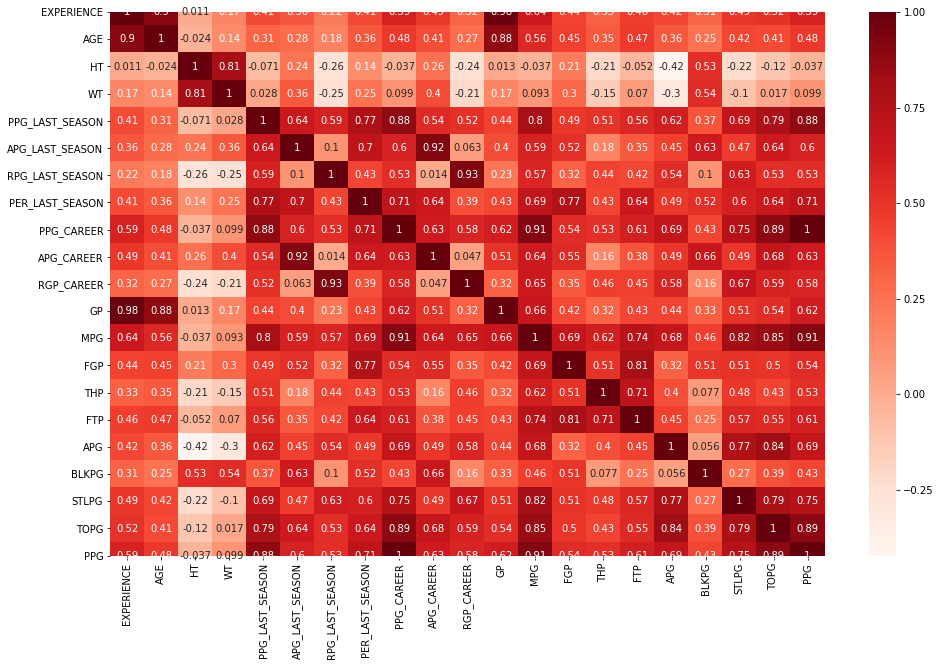

In [24]:
#Using Pearson Correlation sem o salário
plt.figure(figsize=(16,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

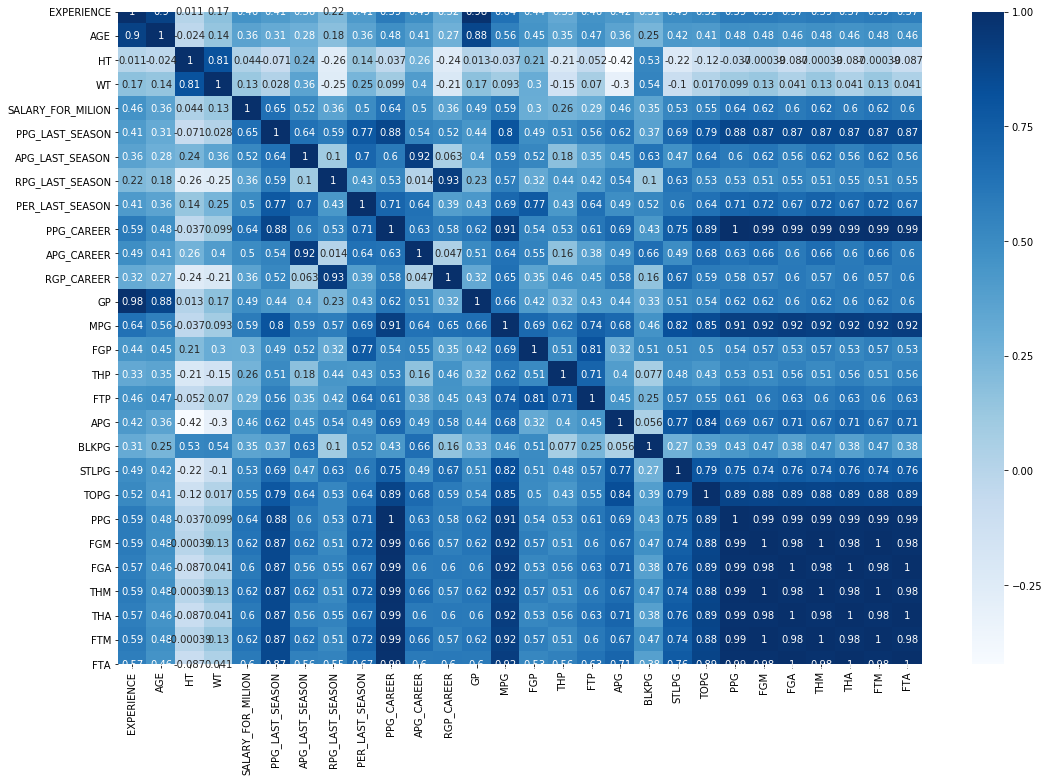

In [25]:
#Using Pearson Correlation com todos Dataset
plt.figure(figsize=(18,12))
cor2 = df2.corr()
sns.heatmap(cor2, annot=True, cmap=plt.cm.Blues)
plt.show()

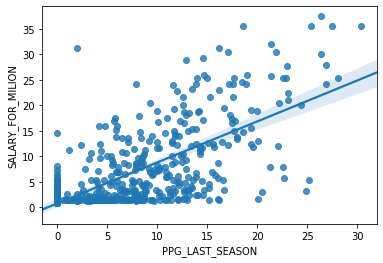

In [26]:
sns.regplot(x='PPG_LAST_SEASON', y='SALARY_FOR_MILION', data=df2)

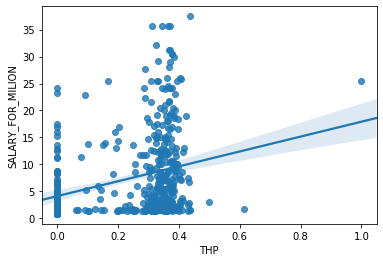

In [27]:
sns.regplot(x='THP', y='SALARY_FOR_MILION', data=df2)

In [28]:
df2

TEAM             NAME  EXPERIENCE POSITION   AGE      HT  \
0    Boston Celtics      Aron Baynes           6       SF  31.0  208.28   
2    Boston Celtics      Jabari Bird           1       SG  24.0  198.12   
3    Boston Celtics     Jaylen Brown           2        F  21.0  200.66   
6    Boston Celtics   Gordon Hayward           8       SF  28.0  203.20   
7    Boston Celtics       Al Horford          11       PF  32.0  208.28   
..              ...              ...         ...      ...   ...     ...   
545       Utah Jazz    Georges Niang           2       SF  25.0  203.20   
546       Utah Jazz    Royce O'Neale           1       SF  25.0  198.12   
547       Utah Jazz      Ricky Rubio           7       PG  27.0  193.04   
548       Utah Jazz  Thabo Sefolosha          12       SF  34.0  200.66   
549       Utah Jazz        Ekpe Udoh           6        C  31.0  208.28   

         WT           COLLEGE  SALARY_FOR_MILION  PPG_LAST_SEASON  ...  BLKPG  \
0    117.65  Washington State           5.193600              6.0  ...    0.5   
2     89.59        California           1.349464              3.0  ...    0.1   
3     99.55        California           5.169960             14.5  ...    0.3   
6    101.81            Butler          31.214295              2.0  ...    0.4   
7    110.86           Florida          28.928709             12.9  ...    1.2   
..      ...               ...                ...              ...  ...    ...   
545  104.07        Iowa State           1.512601              1.0  ...    0.0   
546  102.26            Baylor           1.378242              5.0  ...    0.2   
547   85.97                 -          14.975000             13.1  ...    0.1   
548   99.55                 -           5.250000              8.2  ...    0.4   
549  110.86            Baylor           3.360000              2.6  ...    1.2   

     STLPG  TOPG   PPG  FGM   FGA  THM   THA  FTM   FTA  
0      0.2   0.8   5.4  2.2   4.3  2.2   4.3  2.2   4.3  
2      0.2   0.6   3.0  1.2   2.0  1.2   2.0  1.2   2.0  
3      0.7   1.3  10.4  3.8   8.3  3.8   8.3  3.8   8.3  
6      1.0   2.0  15.6  5.3  11.9  5.3  11.9  5.3  11.9  
7      0.8   1.6  14.2  6.0  11.4  6.0  11.4  6.0  11.4  
..     ...   ...   ...  ...   ...  ...   ...  ...   ...  
545    0.2   0.3   0.9  0.4   1.5  0.4   1.5  0.4   1.5  
546    0.5   0.8   5.0  1.7   4.1  1.7   4.1  1.7   4.1  
547    2.0   2.8  10.8  3.4   9.0  3.4   9.0  3.4   9.0  
548    1.1   0.9   6.1  2.3   5.2  2.3   5.2  2.3   5.2  
549    0.5   0.6   3.7  1.4   3.2  1.4   3.2  1.4   3.2  

[440 rows x 32 columns]

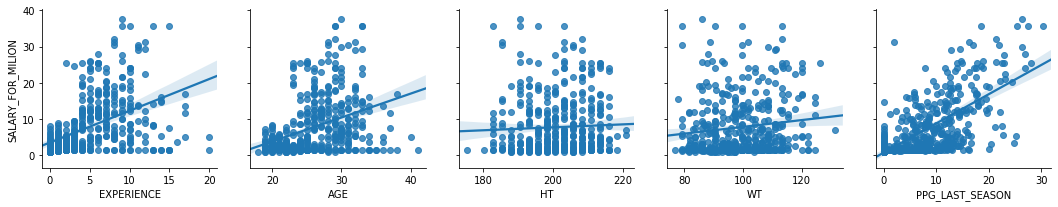

In [29]:
g = sns.pairplot(df2,
                 x_vars=['EXPERIENCE', 'AGE', 'HT', 'WT','PPG_LAST_SEASON'],
                 y_vars=['SALARY_FOR_MILION'],kind="reg",height=3)

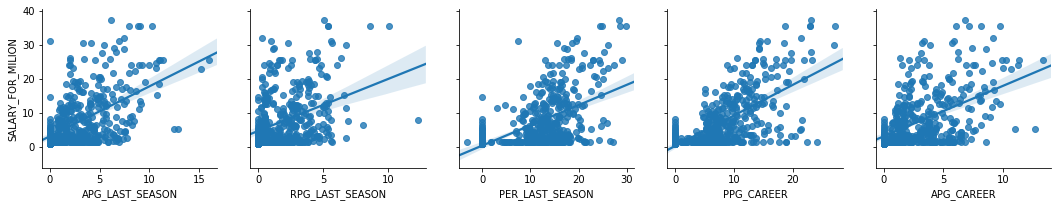

In [30]:

g = sns.pairplot(df2,
                 x_vars=['APG_LAST_SEASON','RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER'],
                 y_vars=['SALARY_FOR_MILION'],kind="reg",height=3)
#g.fig.set_size_inches(2,15)



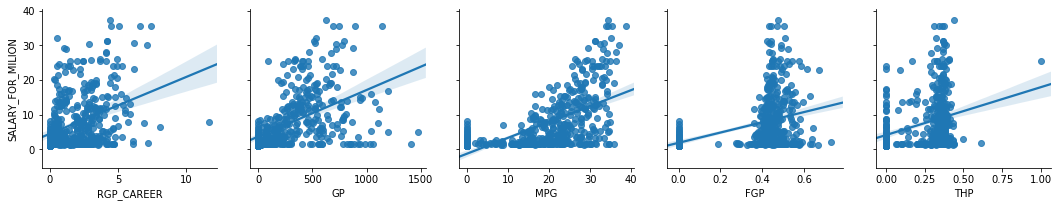

In [31]:
g = sns.pairplot(df2,
                 x_vars=[ 'RGP_CAREER', 'GP', 'MPG', 'FGP', 'THP'],
                 y_vars=['SALARY_FOR_MILION'],kind="reg",height=3)

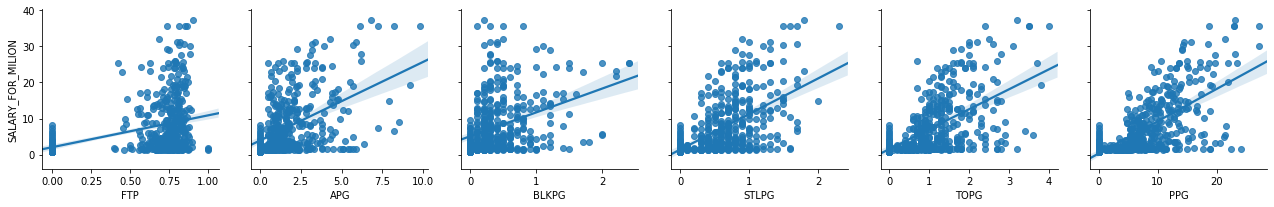

In [32]:
g = sns.pairplot(df2,
                 x_vars=['FTP', 'APG', 'BLKPG', 'STLPG', 'TOPG', 'PPG'],
                 y_vars=['SALARY_FOR_MILION'],kind="reg",height=3)

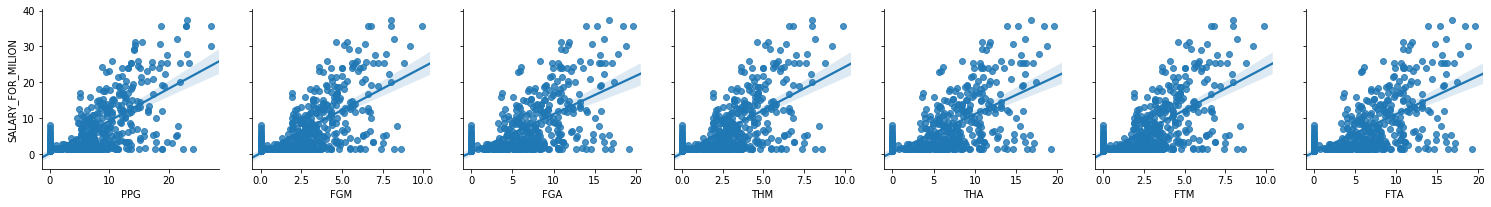

In [33]:
g = sns.pairplot(df2,
                 x_vars=['PPG','FGM','FGA','THM','THA','FTM','FTA'],
                 y_vars=['SALARY_FOR_MILION'],kind="reg",height=3)

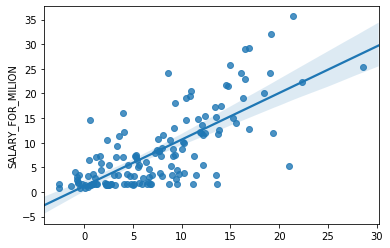

In [34]:
regr = linear_model.LinearRegression()

#Variável alvo
y = df2['SALARY_FOR_MILION']

#Variaveis para relação
x = df2.loc[:,['EXPERIENCE','AGE','HT','WT','PPG_LAST_SEASON','APG_LAST_SEASON',      
'RPG_LAST_SEASON','PER_LAST_SEASON','PPG_CAREER','APG_CAREER', 'RGP_CAREER','GP','MPG',
'FGP','THP','FTP','APG','BLKPG','STLPG','TOPG','PPG','FGM','FGA','THM','THA','FTM','FTA']] 


x = df2.loc[:,['EXPERIENCE', 'AGE', 'HT', 'WT',
        'PPG_LAST_SEASON', 'APG_LAST_SEASON',
       'RPG_LAST_SEASON', 'PER_LAST_SEASON', 'PPG_CAREER', 'APG_CAREER',
        'APG', 'BLKPG', 'STLPG', 'TOPG']] 




#x = df2.loc[:,['PPG_LAST_SEASON','PPG_CAREER','MPG','PPG','FGM','FGA','THM','THA','FTM','FTA']] 

#train-test (Divisão dos daos en treino e teste)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=72)

# Trainando o modelo a partir dos dados divididos para treino (77% dos dados)
regr.fit(x_train, y_train)

# Previsão usando dados para teste (33% dos dados)
yp = regr.predict(x_test)

#Desenho do gráfico para ver a linearidade do modelo,
#plt.scatter(yp,y_test)
sns.regplot(x=yp, y=y_test, data=df2)


In [35]:
#Verificando a performance do algoritimo
r2_score(y_test,yp)



0.5295619259547577

In [36]:
x

EXPERIENCE   AGE      HT      WT  PPG_LAST_SEASON  APG_LAST_SEASON  \
0             6  31.0  208.28  117.65              6.0              1.1   
2             1  24.0  198.12   89.59              3.0              0.6   
3             2  21.0  200.66   99.55             14.5              1.6   
6             8  28.0  203.20  101.81              2.0              0.0   
7            11  32.0  208.28  110.86             12.9              7.4   
..          ...   ...     ...     ...              ...              ...   
545           2  25.0  203.20  104.07              1.0              0.3   
546           1  25.0  198.12  102.26              5.0              1.4   
547           7  27.0  193.04   85.97             13.1              5.3   
548          12  34.0  200.66   99.55              8.2              0.9   
549           6  31.0  208.28  110.86              2.6              2.4   

     RPG_LAST_SEASON  PER_LAST_SEASON  PPG_CAREER  APG_CAREER  APG  BLKPG  \
0                5.4            12.09         5.4         0.7  0.7    0.5   
2                1.5            12.18         3.0         0.6  0.6    0.1   
3                4.9            13.69        10.4         1.2  1.2    0.3   
6                1.0             7.43        15.6         3.4  3.4    0.4   
7                1.1            17.63        14.2         8.6  3.2    1.2   
..               ...              ...         ...         ...  ...    ...   
545              1.0             9.22         0.9         0.3  0.3    0.0   
546              3.4            10.84         5.0         1.4  1.4    0.2   
547              4.6            15.43        10.8         7.9  7.9    0.1   
548              4.2            15.86         6.1         1.5  1.5    0.4   
549              1.2            15.19         3.7         3.0  0.7    1.2   

     STLPG  TOPG  
0      0.2   0.8  
2      0.2   0.6  
3      0.7   1.3  
6      1.0   2.0  
7      0.8   1.6  
..     ...   ...  
545    0.2   0.3  
546    0.5   0.8  
547    2.0   2.8  
548    1.1   0.9  
549    0.5   0.6  

[440 rows x 14 columns]

In [67]:
#fazendo copia dos dataset que selecionei como melhores resultados
xn = x.copy()
yn = y.copy()
xnmm = x.copy()
ynmm= y.copy()

In [68]:
#normalizando
xn =(xn-xn.mean())/xn.std()
yn =(yn-yn.mean())/yn.std()

#normalizando com mim - max
xnmm=(xnmm-xnmm.min())/(xnmm.max()-xnmm.min())
ynmm=(ynmm-ynmm.min())/(ynmm.max()-ynmm.min())

#normalizado e maxminscaller
xnm=(xn-xn.min())/(xn.max()-xn.min())
ynm=(ynmm-ynmm.min())/(yn.max()-yn.min()) 


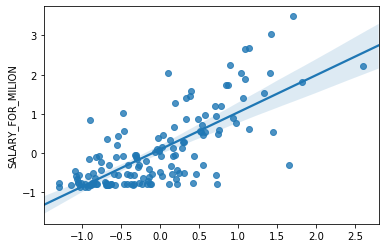

In [77]:
#train-test (Divisão dos daos en treino e teste)
x_train, x_test, y_train, y_test = train_test_split(xn, yn, test_size=0.33, random_state=72)

# Trainando o modelo a partir dos dados divididos para treino (77% dos dados)
regr.fit(x_train, y_train)

# Previsão usando dados para teste (33% dos dados)
yp = regr.predict(x_test)

#Desenho do gráfico para ver a linearidade do modelo,
#plt.scatter(yp,y_test)
sns.regplot(x=yp, y=y_test, data=df2)

In [78]:
r2_score(y_test,yp)

0.5295619259547577

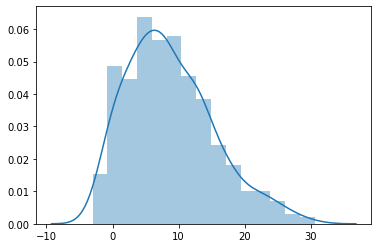

In [79]:
xt = np.random.normal(x['PPG_LAST_SEASON'])
sns.distplot(xt);

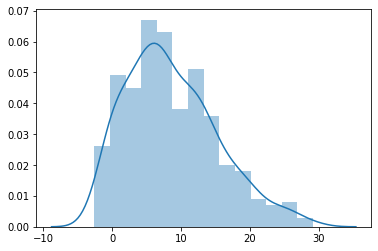

In [81]:
xt = np.random.normal(df2['PPG_LAST_SEASON'])
sns.distplot(xt);

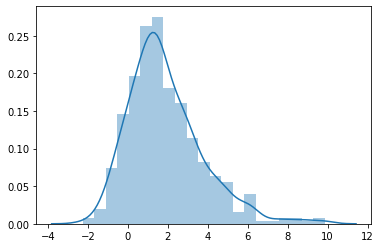

In [80]:
xt = np.random.normal(x['APG'])
sns.distplot(xt);

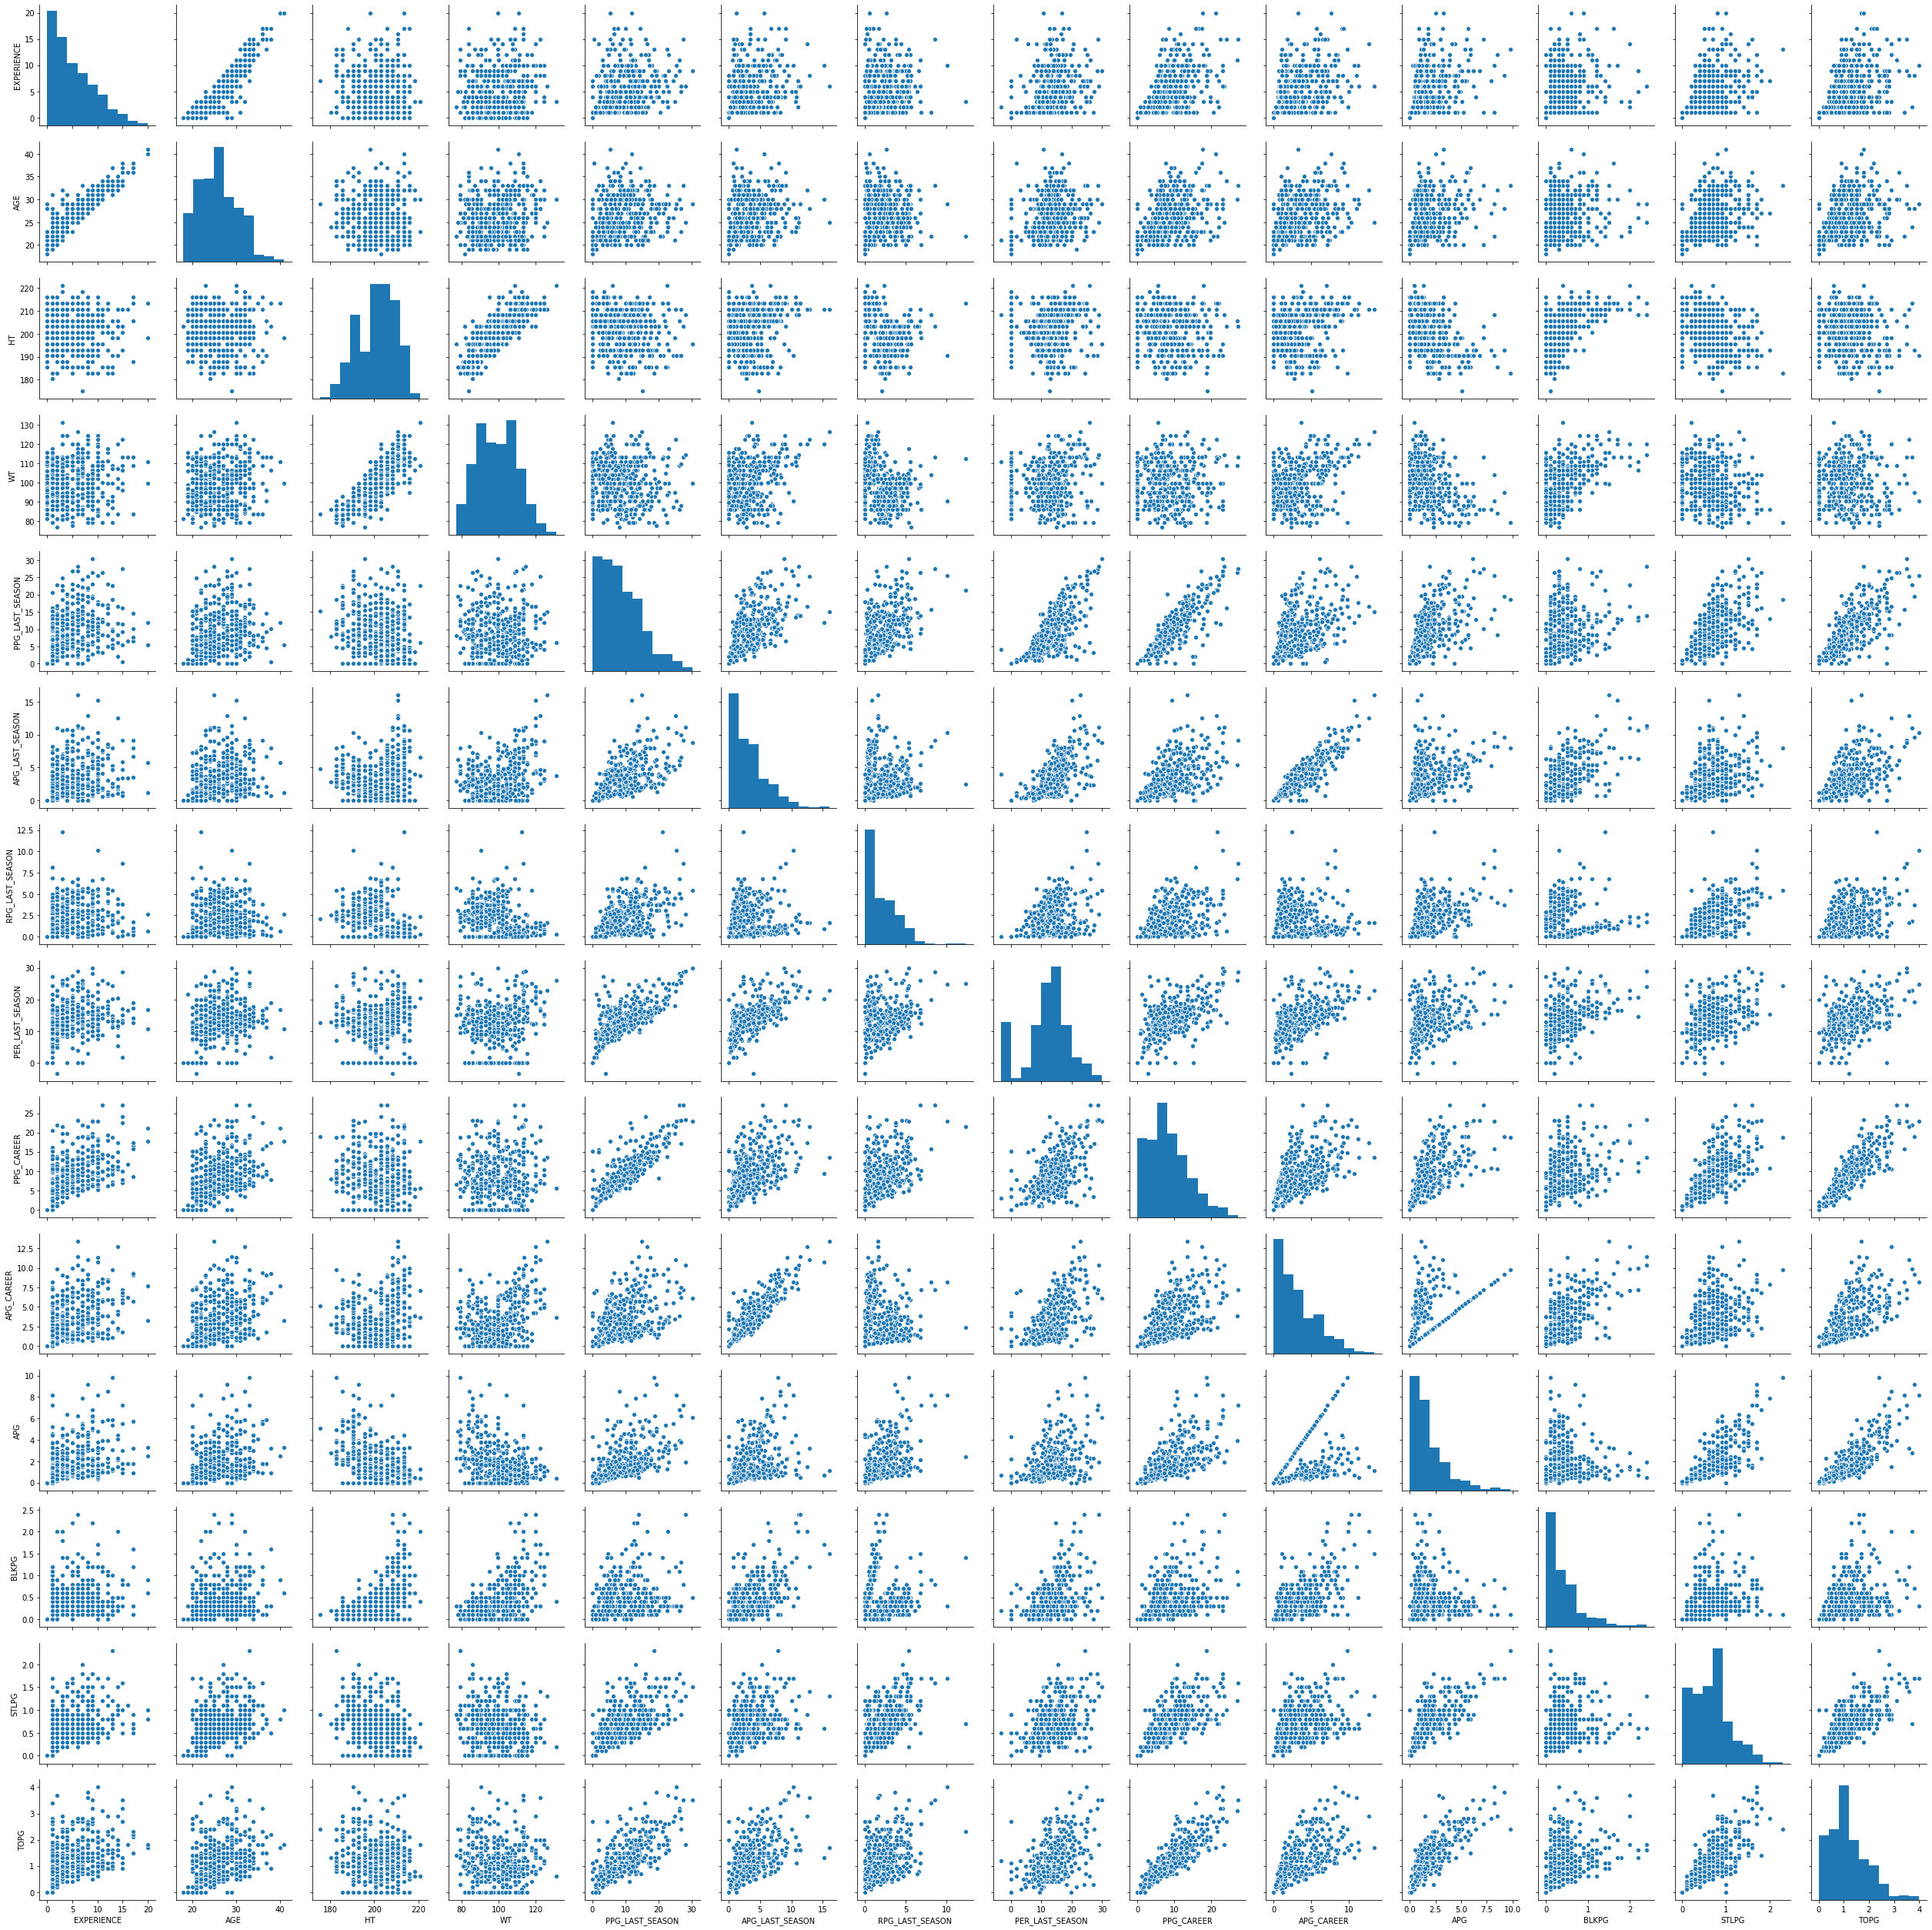

In [59]:
sns.pairplot(x);

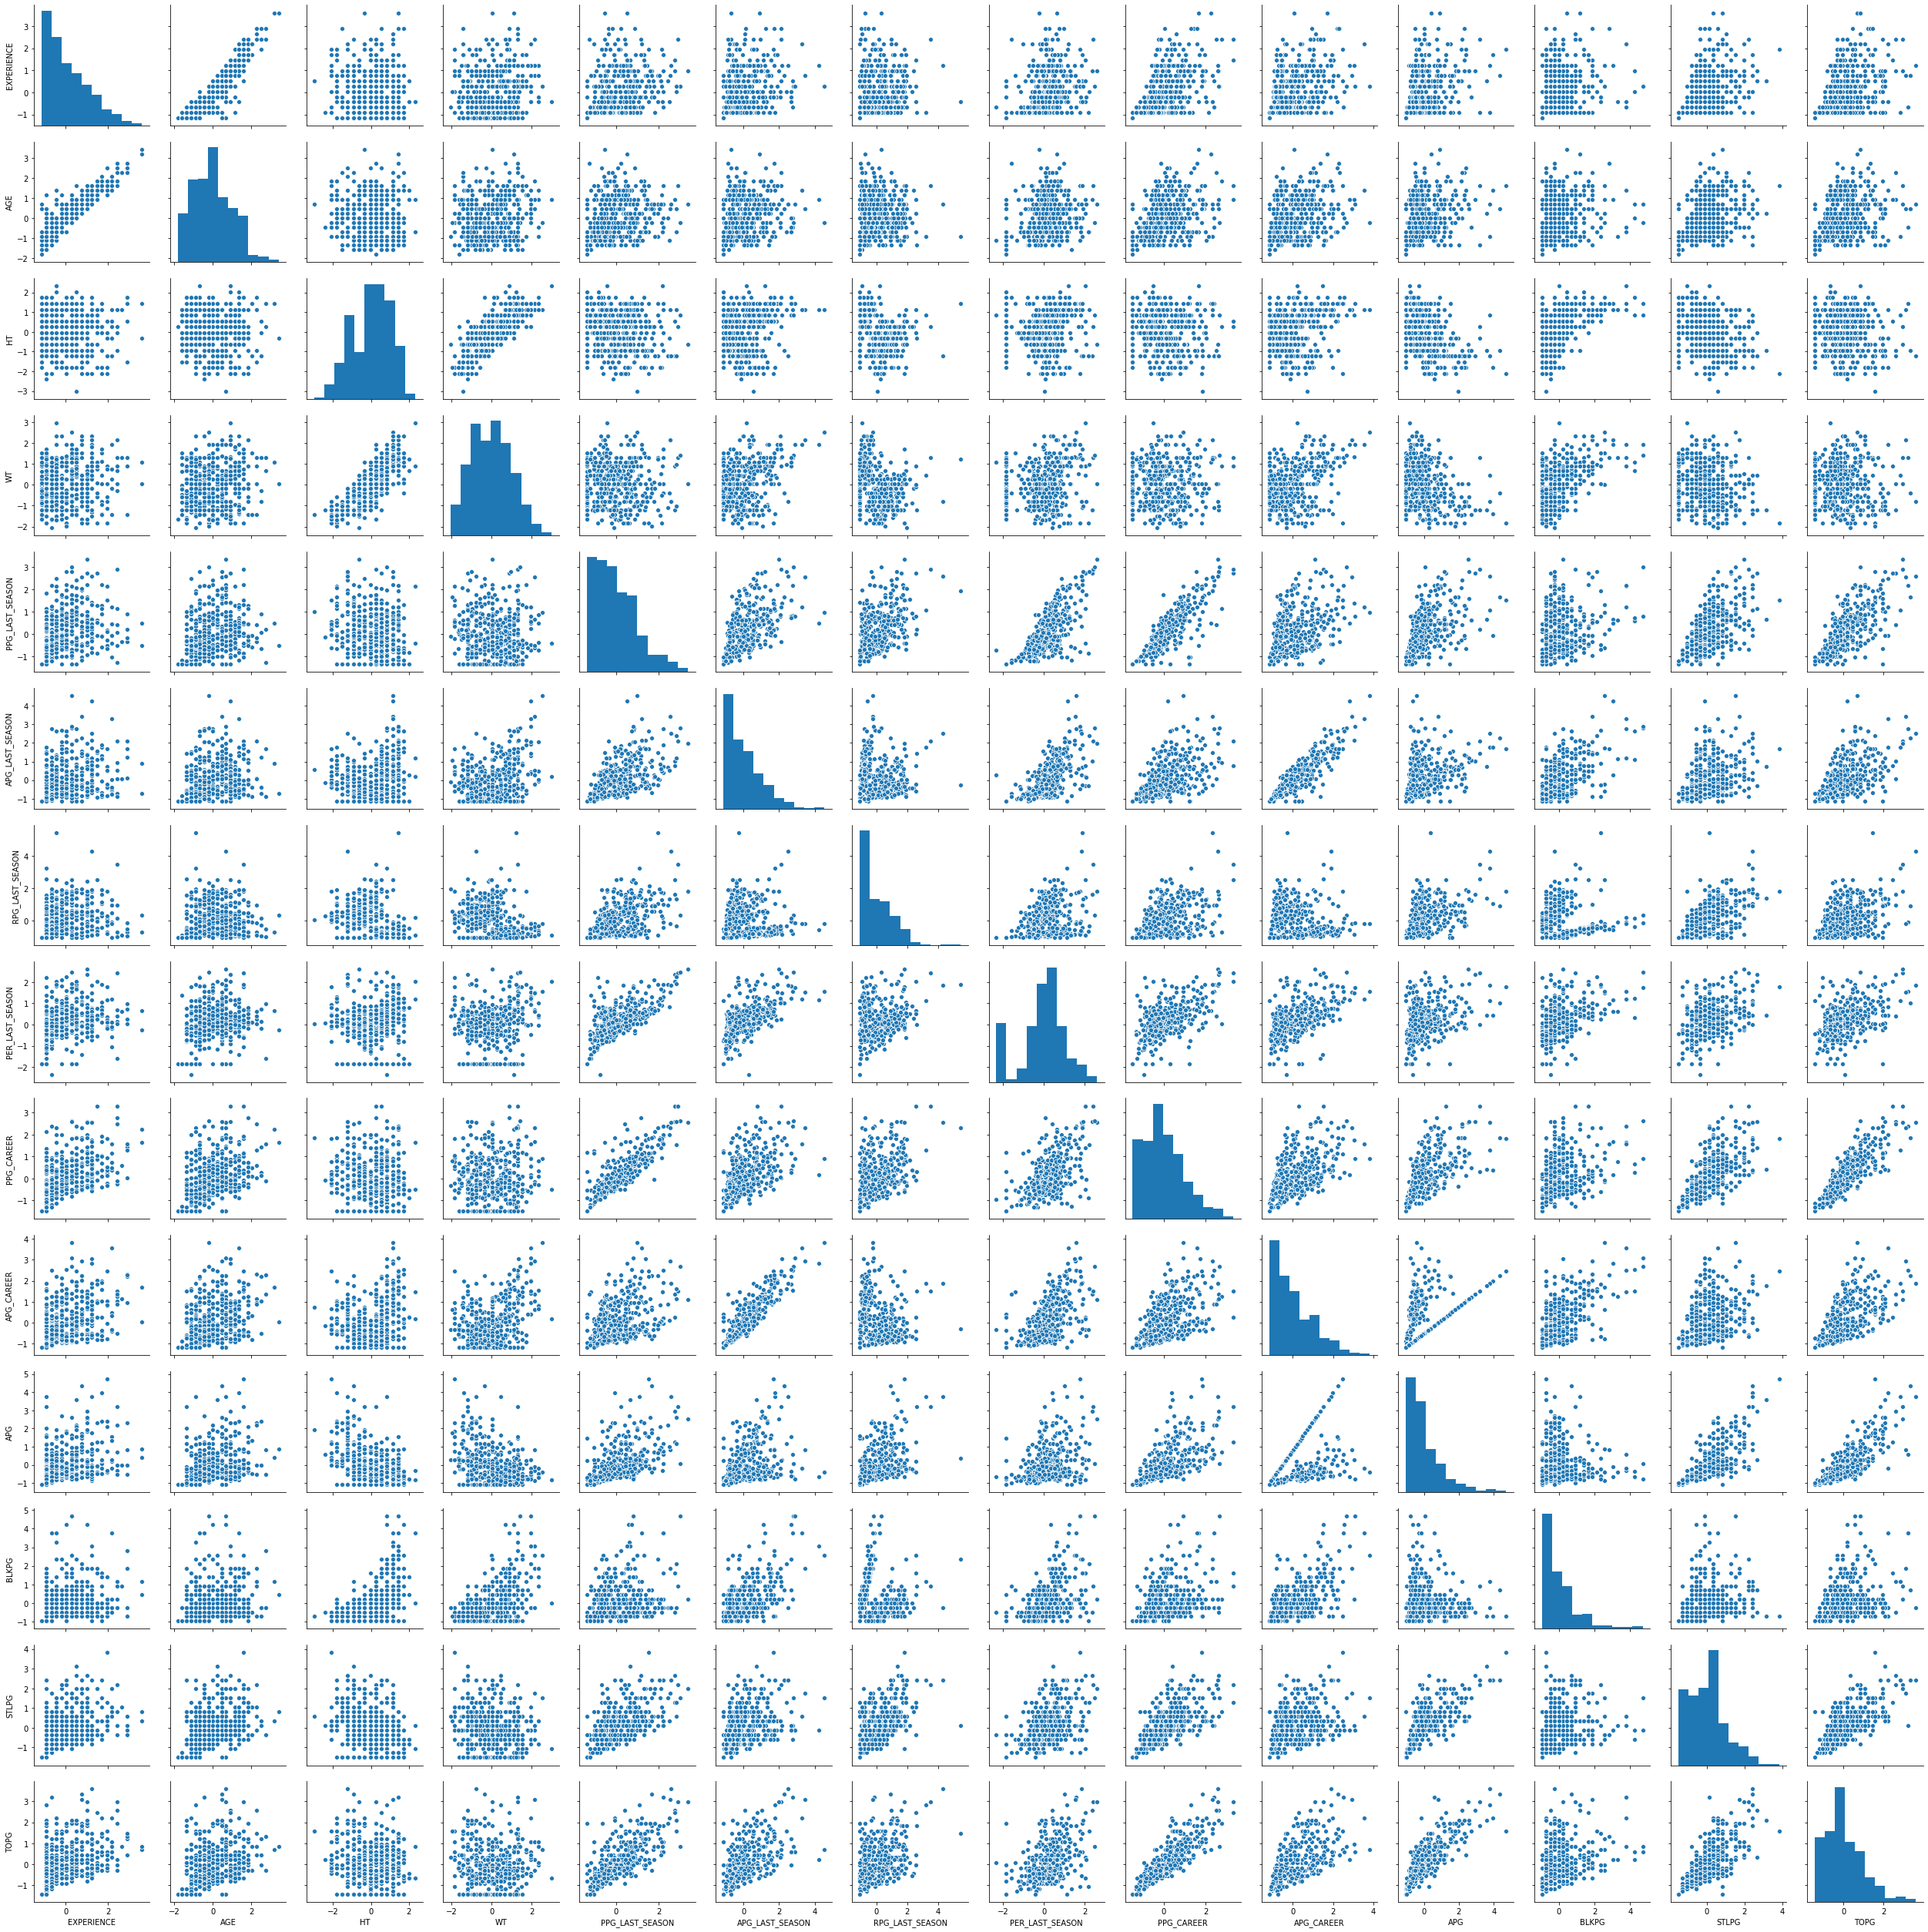

In [60]:
sns.pairplot(xn);

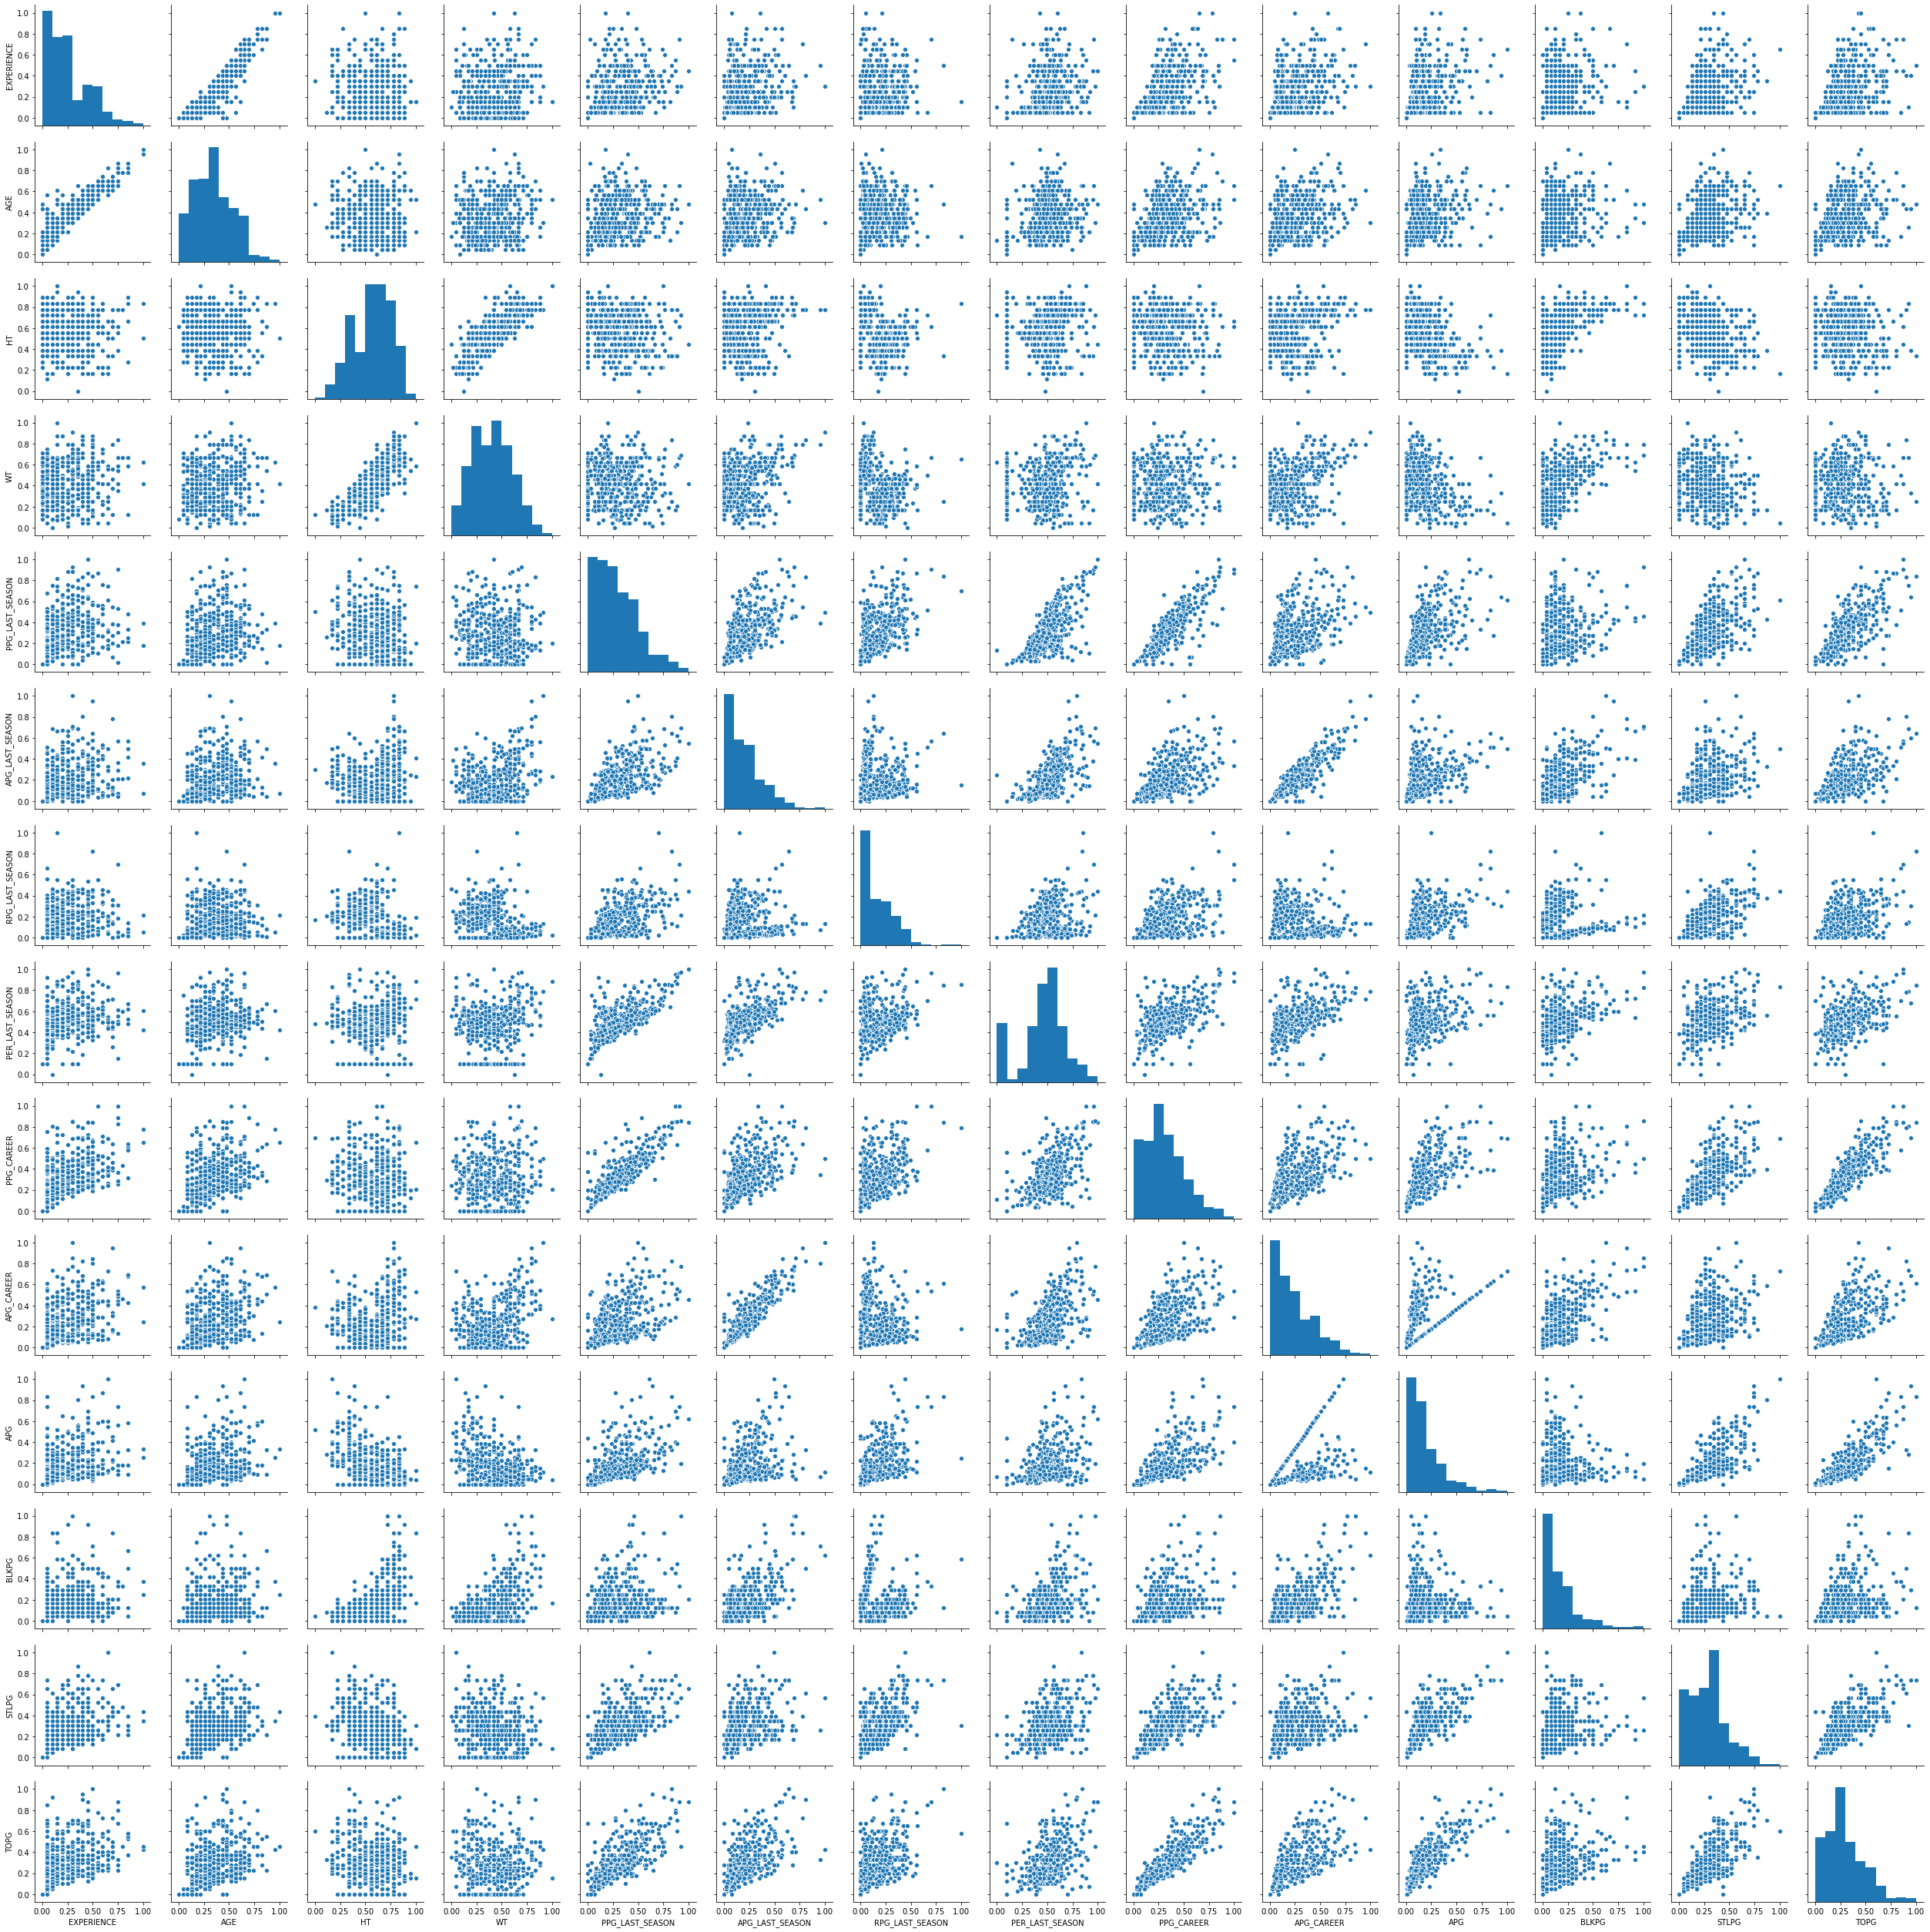

In [61]:
sns.pairplot(xnmm);